<h1><center>Homework 3</center></h1>

<h3>Submission Instructions</h3>
<p>
For submission, you only need to submit your Jupyter Notebook file named "StudentName_ID.ipynb"

If you have any questions, you can contact me via kamard@itu.edu.tr
</p>

<h3> Homework Instructions </h3>

<p>In this homework, you will implement Girvan-Newman algorithm, and use the algorithm to decompose the network into a number of modules so that it has the highest modularity. Remember the steps of Girvan-Newman algorithm from Graph Theory Blink 9.3:

<ol>
  <li>Calculate the betweenness centrality of each edge in graph G</li>
  <li>Remove the edge with the highest betweenness centrality. Choose randomly in case same score occurs.</li>
  <li>Recalculate the betweenness centrality of all remaining edges</li>
  <li>Repeat steps 2 and 3 until no edges remain. </li>
</ol>

You will need to modify the above steps so that you find the number of connected components that has the highest modularity. To do that, you can calculate modularity each time new connected component is formed during the Girvan-Newman algorithm, and find the decomposition with highest modularity. Don't forget to compute the modularity of the initial network, as network might not consist any modules 

<h2>WHAT YOU NEED TO DO</h2>
<ol>
    <li> Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity <b>(20p)</b>
    <li> Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). <b>(60p)</b>
    <li> Visualize the final results. <b>(10p)</b>
    <li> What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. <b>(10p)</b>

Below, I have given you some basic functions to start with. 
</p>

In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import random

You can use RandomGraph function to create a random graph that returns the graph as both networkx.Graph and adjacency matrix as numpy.array.

(Optional, will not affect your grade) You can modify the VisualiseGraph function to give each connected component different graph, or make other interesting visualizations. Play with it however you want!

In [2]:
def RandomAdjacencyMatrix(n = 10, p = 0.5):
    M = np.zeros((n,n), dtype=np.uint8)
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                M[i,j], M[j, i] = 1, 1
    return M

def RandomGraph(n = 10, p = 0.5):
    '''
    Creates a random networkx undirected, unweighted graph
    
    Inputs:
        n: number of nodes in graph
        p: probability of an edge being included
        
    Outputs:
        M: Adjacency matrix as numpy array
        G: nx Graph
        
    '''
    M = RandomAdjacencyMatrix(n, p)
    edges = np.transpose(np.where(M==1))
    
    G = nx.Graph()
    for i in range(edges.shape[0]):
        G.add_edge(edges[i, 0], edges[i, 1])
    
    return G, M

def VisualizeGraph(G):
    nx.draw_networkx(G)
    plt.show()
    

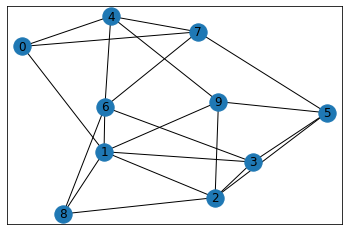

In [3]:
n = 10
p = 0.5
G, M = RandomGraph(n, p)
VisualizeGraph(G)

## You can start from here.

Implement all your codes and write all your comments below this cell. 

For the algorithm; you are only allowed to use networkx to compute <b>modularity, connected components and betwenness centralities.</b> You need to implement Girvan-Nerman and rest of the algorithm by yourself. 

In [4]:
#read adj matrix
nd1 = np.load("NetworkData1.npy")
nd2 = np.load("NetworkData2.npy")
nd3 = np.load("NetworkData3.npy")

Modularity is used for detecting communities. Modules or Communities are defined as densely connected sub-graphs. Nodes within communities are highly connected than between communities. 

In first network, looks like there is only 1 commmunity since all nodes are highly connected between all nodes. There are no noticable modules in this graph.

In second and third network, we can clearly see that they are structured in different big sub modules. Second network has 3 communities and third one has 4 sub-modules.

Hierarchical modularity occurs if sub-modules of a graph has hierarchy in sub-modules. It is not obvious for those graphs 


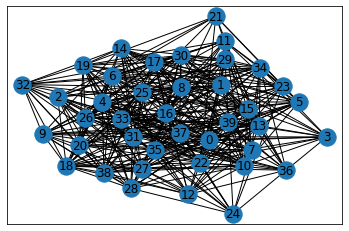

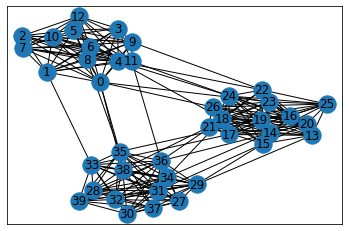

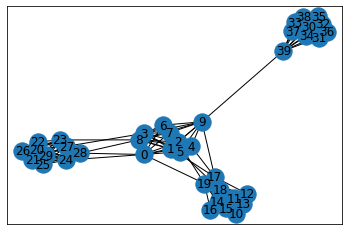

In [5]:
#create graphs from adj matrix
G1=nx.from_numpy_matrix(nd1)
G2=nx.from_numpy_matrix(nd2)
G3=nx.from_numpy_matrix(nd3)
VisualizeGraph(G1)
VisualizeGraph(G2)
VisualizeGraph(G3)

In [55]:
def selectEdges(G): # this function selects the edges with the highest betweenness centrality value from graph
    betweenness = nx.edge_betweenness_centrality(G) # calculates betweenness centrality
    return sorted(betweenness.items(), key=lambda item: item[1], reverse = True)[0][0] # highest betweenness centrality

def girvanNewman(G):
    best_modularity = -1
    g_base = G.copy()
    
    while G.number_of_edges() != 0:    #until no edge remains
        _numbOfConnComps = nx.number_connected_components(G)   # finds connected components
        numbOfConnComps = _numbOfConnComps
        nodes = nx.connected_components(G)   # calculates new connected components          
        modularity = nx.algorithms.community.modularity(g_base,nodes)# calculates modularity on original graph start from 1 connected component
        
        if modularity > best_modularity: # after removing, if new modularity is high new nodes are stored
            best_modularity = modularity
            cc = list(nx.connected_components(G))  
            
        while numbOfConnComps <= _numbOfConnComps: #removes edges until it reaches the previous component number +1 comp num
            removeNode = selectEdges(G) # select edge with highest betweennes centrality
            G.remove_edge(removeNode[0], removeNode[1]) # remove edges from graph
            numbOfConnComps = nx.number_connected_components(G)   # finds connected components
        
    nodes = nx.connected_components(G)   # calculates no edge graph components          
    modularity = nx.algorithms.community.modularity(g_base,nodes)# calculates modularity on original graph

    if modularity > best_modularity: # If no edges components has the highest modularity 
        best_modularity = modularity
        cc = list(nx.connected_components(G))   
        
    return cc, best_modularity
    
def printSummary(c, m):
    print(" Highest Modularity : ", m, "\n",
     "Number of Connected Components : ", len(c), "\n",
     "Component Nodes : ", c)


 Highest Modularity :  0.02086304172608335 
 Number of Connected Components :  21 
 Component Nodes :  [{0}, {1, 4, 5, 6, 8, 10, 12, 13, 14, 15, 17, 26, 27, 30, 32, 33, 34, 35, 37, 38}, {2}, {3}, {7}, {9}, {11}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {28}, {29}, {31}, {36}, {39}]


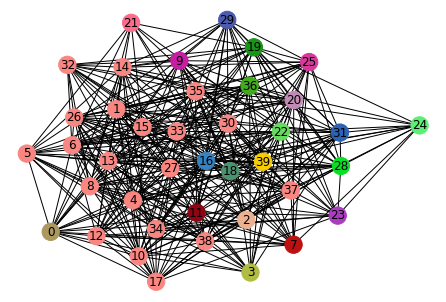

In [59]:
c, m = girvanNewman(G1.copy())

printSummary(c, m)

#colorize graph with connected comps
colors =[]
for t in range(len(c)):
    colors.append((random.random(), random.random(), random.random()))

node_color = []
for node in G1:
    for i in range(len(c)):
        if node in c[i]:
            node_color.append(colors[i])
    

nx.draw(G1, node_color=node_color, with_labels=True)
plt.show()

 Highest Modularity :  0.5746523112066647 
 Number of Connected Components :  3 
 Component Nodes :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}, {32, 33, 34, 35, 36, 37, 38, 39, 27, 28, 29, 30, 31}]


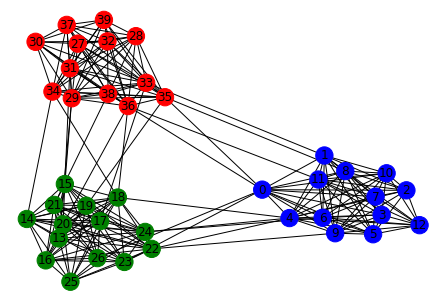

In [57]:

colors = ['blue', 'green', 'red', 'yellow']

c, m = girvanNewman(G2.copy())

printSummary(c, m)

node_color = []
for node in G2:
    for i in range(len(c)):
        if node in c[i]:
            node_color.append(colors[i])
    

nx.draw(G2, node_color=node_color, with_labels=True)
plt.show()

 Highest Modularity :  0.6821634906955224 
 Number of Connected Components :  4 
 Component Nodes :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}]


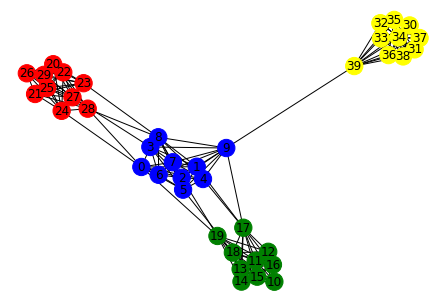

In [58]:
colors = ['blue', 'green', 'red', 'yellow']

c,m = girvanNewman(G3.copy())
printSummary(c, m)

node_color = []
for node in G3:
    for i in range(len(c)):
        if node in c[i]:
            node_color.append(colors[i])
    

nx.draw(G3, node_color=node_color, with_labels=True)
plt.show()

In the first graph, we can see that the highest modularity after girvan-newman algorithm runs is actually very low and found too many small subgroups that contains only 1 node(mostly). 

In the second graph, we can see 3 sub-modules. And its best modularity is 0.57

In the third graph, we can see that nicely separated 4 sub-connected components. This sub-modules give the best modularity 0.68

Second and third graphs are modular graphs and they are highly connected within modules, but they have less connection between communities and it is observable. they are easily evalveable, adabtable, flexible and has complexity.  